In [1]:
import pytensor
pytensor.config.floatX = "float32"
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pytensor.tensor as pt
from sklearn.metrics import r2_score

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)

In [3]:
def filter_regions(x):
    if type(x)==str:
        if "г." in x:
            return x.replace("г.","").strip()
        elif "федеральный округ" in x:
            return np.nan
        elif "в том числе:" in x:
            return np.nan
        elif "Ненецкий автономный округ" in x:
            return np.nan
        elif "Архангельская область  без автономного округа" in x:
            return np.nan
        elif "Ханты-Мансийский автономный округ – Югра" in x:
            return np.nan
        elif "Ямало-Ненецкий автономный округ" in x:
            return np.nan
        elif "Тюменская область без автономных округов" in x:
            return np.nan
        else:
            return x.strip()
    else:
        return x


In [4]:
df3=pd.read_excel("./data/L.xlsx","3.1").drop(0).map(lambda x: filter_regions(x)).dropna().rename(columns={"Unnamed: 0":"Region"})
df3=pd.merge(df3,pd.read_excel("./data/L.xlsx","3.2").drop(0).map(lambda x: filter_regions(x)).dropna().rename(columns={"Unnamed: 0":"Region"}),on="Region")
df3=pd.merge(df3,pd.read_excel("./data/L.xlsx","3.3").drop(0).map(lambda x: filter_regions(x)).drop(27).dropna().rename(columns={"Unnamed: 0":"Region"}),on="Region")
df3=pd.merge(df3,pd.read_excel("./data/L.xlsx","3.4").drop(0).map(lambda x: filter_regions(x)).dropna().rename(columns={"Unnamed: 0":"Region"}),on="Region")
df3=df3.melt(id_vars="Region",value_vars=range(2000,2022),var_name="Date",value_name="L")

In [5]:
subdf=df3
def floatize(x):
    if type(x)==str:
        x=x.replace("\xa0","").replace(" ","")
        if x=="…":
            x=np.nan
        return float(x)
    else:
        return x
subdf[["L"]]=subdf[["L"]].map(floatize)

In [6]:
regions=subdf.Region.unique()

In [7]:
regions

array(['Белгородская область', 'Брянская область', 'Владимирская область',
       'Воронежская область', 'Ивановская область', 'Калужская область',
       'Костромская область', 'Курская область', 'Липецкая область',
       'Московская область', 'Орловская область', 'Рязанская область',
       'Смоленская область', 'Тамбовская область', 'Тверская область',
       'Тульская область', 'Ярославская область', 'Москва',
       'Республика Карелия', 'Республика Коми', 'Архангельская область',
       'Вологодская область', 'Калининградская область',
       'Ленинградская область', 'Мурманская область',
       'Новгородская область', 'Псковская область', 'Санкт-Петербург',
       'Республика Адыгея', 'Республика Калмыкия', 'Краснодарский край',
       'Астраханская область', 'Волгоградская область',
       'Ростовская область', 'Республика Дагестан',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республика',
       'Республика Северная Осетия – 

In [8]:
k=np.exp(np.log(df3[df3["Region"]=="Чеченская Республика"]["L"].dropna()).diff()).prod()**(1/(len(df3[df3["Region"]=="Чеченская Республика"]["L"].dropna())-1))

In [9]:
df3[df3["Region"]=="Чеченская Республика"]["L"]

39        NaN
120       NaN
201       NaN
282       NaN
363       NaN
444       NaN
525     460.0
606     485.0
687     473.0
768     549.0
849     551.0
930     551.0
1011    597.0
1092    649.0
1173    633.0
1254    618.0
1335    621.0
1416    623.0
1497    629.0
1578    634.0
1659    653.0
1740    654.0
Name: L, dtype: float64

In [10]:
arrtoreplace=df3[df3["Region"]=="Чеченская Республика"]["L"][525]/(k**np.arange(6,0,-1))

In [11]:
df3.iloc[[39,120,201,282,363,444],2]=arrtoreplace

In [12]:
df3[df3["Region"]=="Чеченская Республика"]["L"]

39      399.604035
120     409.089054
201     418.799210
282     428.739847
363     438.916435
444     449.334575
525     460.000000
606     485.000000
687     473.000000
768     549.000000
849     551.000000
930     551.000000
1011    597.000000
1092    649.000000
1173    633.000000
1254    618.000000
1335    621.000000
1416    623.000000
1497    629.000000
1578    634.000000
1659    653.000000
1740    654.000000
Name: L, dtype: float64

In [13]:
subdf=subdf[subdf["Region"].isin(regions)].drop_duplicates(["Region","Date"]).sort_values(["Date","Region"])

In [14]:
subdf=subdf.sort_values(["Date","Region"])

In [15]:
regions=subdf.Region.unique()

In [16]:
regions

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Забайкальский край',
       'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край',
       'Карачаево-Черкесская Республика', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Нижегородская область', 'Новгородская область',
       'Новосибирская область', 'Омская область', 'Оренбургская область',
       'Орловская область', 'Пензенская област

In [17]:
initial=subdf[subdf["Date"]==2000]["L"].to_numpy()

In [18]:
endp=subdf[subdf["Date"]==2021]["L"].to_numpy()

In [19]:
len(endp)

80

In [20]:
endp/=endp.sum()

In [21]:
endp.max()

0.09908343442512468

In [25]:
np.save("./data/p.npy",endp)

In [26]:
np.save("./data/regions.npy",regions)

In [27]:
initial/initial.sum()

array([0.0173706 , 0.00658743, 0.00989482, 0.00686077, 0.01012716,
       0.00908847, 0.01090617, 0.01820428, 0.00911581, 0.01600391,
       0.00127102, 0.00729811, 0.00809079, 0.01843662, 0.00550775,
       0.0067651 , 0.00766712, 0.00291104, 0.00258304, 0.02018598,
       0.01132984, 0.00519341, 0.03307384, 0.02118366, 0.00710678,
       0.00869213, 0.01168518, 0.00821379, 0.00161269, 0.07212011,
       0.04936476, 0.00740745, 0.02537939, 0.00492008, 0.01890129,
       0.01417255, 0.01445956, 0.00598609, 0.01031849, 0.01952997,
       0.01549824, 0.00504308, 0.00276071, 0.00127102, 0.02691008,
       0.0066421 , 0.01314754, 0.00139402, 0.00196803, 0.00520708,
       0.00748945, 0.00502941, 0.00608176, 0.00662844, 0.0046194 ,
       0.02568006, 0.00158536, 0.00355339, 0.02898745, 0.00826846,
       0.02330203, 0.03351118, 0.01816328, 0.00414106, 0.03185749,
       0.00748945, 0.01747994, 0.00784479, 0.01025016, 0.00713411,
       0.01143918, 0.02319269, 0.0110565 , 0.00923881, 0.01045

In [22]:
target_train=subdf[subdf["Date"].isin(range(2001,2019))]["L"].to_numpy()
target_test=subdf[subdf["Date"].isin(range(2019,2022))]["L"].to_numpy()

In [29]:
(np.exp(np.log(pd.pivot_table(subdf,values="L",index="Date",columns="Region").sum(axis=1)).diff().dropna()).prod())**(1/21)

1.0006597070774323

In [47]:
dim=len(regions)
SR=np.ones((dim,dim))-np.eye(dim)
with pm.Model() as model:
    myarr=np.array([])
    Us=pm.Normal("Us",0,1,shape=(dim,))
    Usmesh0=pt.reshape(Us[None,:].repeat(dim,axis=0),(-1,))
    Usmesh1=pt.reshape(Us[:,None].repeat(dim,axis=1),(-1,))
    
    Usdiff=Usmesh0-Usmesh1
    UsM=pt.reshape(Usdiff,(dim,dim))
    UsT=np.exp(UsM-8*SR)
    UsT/=UsT.sum(axis=1,keepdims=True)
    sigma = pm.HalfCauchy("sigma", beta=10)
    arr=initial
    for i in range(18):
        arr=arr@UsT+0.00066*arr
        myarr=pt.concatenate([myarr,arr],axis=0)
    M=myarr
    likelihood = pm.Laplace("y", M, sigma, observed=target_train)
    idata = pm.sample(300,tune=100,nuts_sampler="numpyro",chains=4,target_accept=0.9999)
    

/home/alex7and7er/miniconda3/envs/pymc-dev/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/alex7and7er/miniconda3/envs/pymc-dev/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/alex7and7er/miniconda3/envs/pymc-dev/lib

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

/home/alex7and7er/miniconda3/envs/pymc-dev/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/alex7and7er/miniconda3/envs/pymc-dev/lib/python3.12/site-packages/jax/_src/numpy/array_methods.py:118: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)
/home/alex7and7er/miniconda3/envs/pymc-dev/lib

array([[<Axes: title={'center': 'Us'}>, <Axes: title={'center': 'Us'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

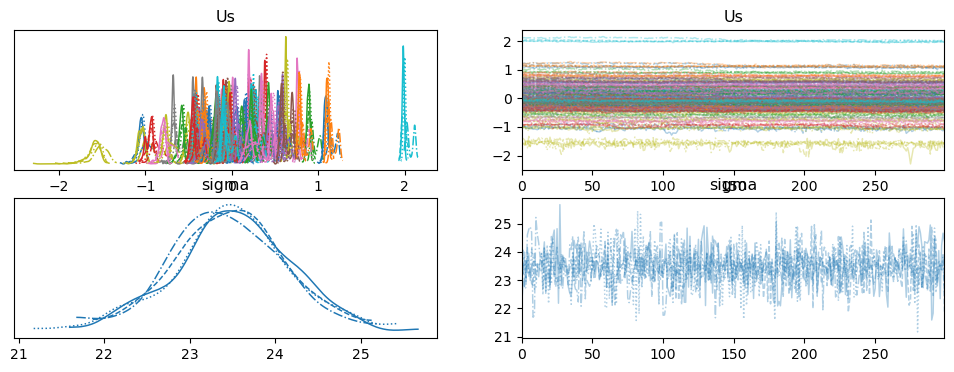

In [48]:
az.plot_trace(idata)

In [49]:
with model:
    idata = pm.sample_posterior_predictive(
        idata,
        var_names=["y"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True,
    )

Sampling: [y]


Output()

In [50]:
y_pred=idata.predictions["y"].mean(("chain","draw"))

In [51]:
r2_score(target_train,y_pred)

0.9985011265573107

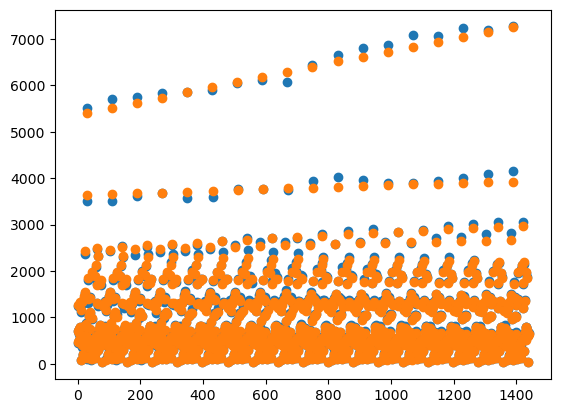

In [52]:
plt.scatter(np.arange(len(target_train)),target_train)
plt.scatter(np.arange(len(y_pred)),y_pred)

In [53]:
idata.posterior["Us"].mean(("chain","draw")).to_numpy()

array([ 0.20800683, -0.31487307, -0.15629354, -0.03347164,  0.17037383,
       -0.03847841,  0.0366961 ,  0.3532373 , -0.08480565,  0.25564972,
       -1.0312697 , -0.06598774, -0.13989307,  0.2255429 , -0.26946566,
       -0.02428238, -0.0954994 , -0.65731436, -0.48231536,  0.30523804,
       -0.13942385, -0.38632995,  0.9114734 ,  0.41481864, -0.35869846,
       -0.15115343,  0.36735693, -0.00695   , -1.0289347 ,  2.011428  ,
        1.1132691 , -0.28763604,  0.44483316, -0.38299257,  0.46065113,
        0.2757863 ,  0.22407553, -0.3147544 , -0.08268628,  0.25814605,
        0.17050056, -0.35899404, -0.5649908 , -0.9255242 ,  0.6152774 ,
       -0.23249766,  0.78889275, -0.27265853, -0.752277  , -0.40856764,
       -0.24292704, -0.2927065 , -0.17543216, -0.07421942, -0.3248032 ,
        0.7228183 , -0.7794104 , -0.4190741 ,  0.65379727, -0.1415821 ,
        0.5683259 ,  1.134747  ,  0.2540135 , -0.42993668,  0.56581134,
       -0.12777995,  0.49197006, -0.14877251, -0.00243561, -0.07

In [23]:
b=-8
dim=len(regions)
SR=np.ones((dim,dim))-np.eye(dim)
U=idata.posterior["Us"].mean(("chain","draw")).to_numpy()

In [24]:
myarr=np.array([])
Usmesh0=np.reshape(U[None,:].repeat(dim,axis=0),(-1,))
Usmesh1=np.reshape(U[:,None].repeat(dim,axis=1),(-1,))

Usdiff=Usmesh0-Usmesh1
UsM=np.reshape(Usdiff,(dim,dim))
UsT=np.exp(UsM+b*SR)
UsT/=UsT.sum(axis=1,keepdims=True)
arr=initial
for i in range(21):
    arr=arr@UsT+0.00066*arr
    myarr=np.concatenate([myarr,arr],axis=0)
M=myarr

In [25]:
np.diag(UsT)

array([0.97512013, 0.95852411, 0.9644355 , 0.96845254, 0.9741784 ,
       0.96829763, 0.97054868, 0.97845412, 0.96682937, 0.97626507,
       0.91833435, 0.96743345, 0.96499885, 0.97554759, 0.96030592,
       0.96873497, 0.96648133, 0.94243735, 0.9512766 , 0.97740288,
       0.96501484, 0.95556566, 0.98769635, 0.97973404, 0.9567326 ,
       0.96461298, 0.97875429, 0.96926109, 0.91850996, 0.99609239,
       0.98998212, 0.95960181, 0.98033102, 0.95570817, 0.98063878,
       0.9767336 , 0.9755121 , 0.95852886, 0.96689794, 0.97632364,
       0.97418163, 0.95672027, 0.94727254, 0.92595101, 0.9834129 ,
       0.96170261, 0.98607157, 0.96018305, 0.93703463, 0.95460495,
       0.96131339, 0.95940322, 0.96376716, 0.96717051, 0.95812445,
       0.98511208, 0.93540656, 0.95414426, 0.98404195, 0.96494122,
       0.98261382, 0.99019989, 0.9762266 , 0.9536633 , 0.98256999,
       0.96540945, 0.98123451, 0.96469491, 0.96939673, 0.96709251,
       0.97157247, 0.9863271 , 0.9734413 , 0.96957591, 0.97134

In [61]:
pd.DataFrame(UsT,index=regions,columns=regions)

,Алтайский край,Амурская область,Архангельская область,Астраханская область,Белгородская область,Брянская область,Владимирская область,Волгоградская область,Вологодская область,Воронежская область,Еврейская автономная область,Забайкальский край,Ивановская область,Иркутская область,Кабардино-Балкарская Республика,Калининградская область,Калужская область,Камчатский край,Карачаево-Черкесская Республика,Кемеровская область,Кировская область,Костромская область,Краснодарский край,Красноярский край,Курганская область,Курская область,Ленинградская область,Липецкая область,Магаданская область,Москва,Московская область,Мурманская область,Нижегородская область,Новгородская область,Новосибирская область,Омская область,Оренбургская область,Орловская область,Пензенская область,Пермский край,Приморский край,Псковская область,Республика Адыгея,Республика Алтай,Республика Башкортостан,Республика Бурятия,Республика Дагестан,Республика Ингушетия,Республика Калмыкия,Республика Карелия,Республика Коми,Республика Марий Эл,Республика Мордовия,Республика Саха (Якутия),Республика Северная Осетия – Алания,Республика Татарстан,Республика Тыва,Республика Хакасия,Ростовская область,Рязанская область,Самарская область,Санкт-Петербург,Саратовская область,Сахалинская область,Свердловская область,Смоленская область,Ставропольский край,Тамбовская область,Тверская область,Томская область,Тульская область,Тюменская область,Удмуртская Республика,Ульяновская область,Хабаровский край,Челябинская область,Чеченская Республика,Чувашская Республика,Чукотский автономный округ,Ярославская область
Алтайский край,0.975120,0.000194,0.000227,0.000257,0.000315,0.000256,0.000276,0.000378,0.000244,0.000343,0.000095,0.000249,0.000231,0.000333,0.000203,0.000259,0.000241,0.000138,0.000164,0.000361,0.000231,0.000181,0.000661,0.000402,0.000186,0.000228,0.000384,0.000264,0.000095,0.001986,0.000809,0.000199,0.000415,0.000181,0.000421,0.000350,0.000332,0.000194,0.000245,0.000344,0.000315,0.000186,0.000151,0.000105,0.000492,0.000211,0.000585,0.000202,0.000125,0.000177,0.000208,0.000198,0.000223,0.000247,0.000192,0.000547,0.000122,0.000175,0.000511,0.000231,0.000469,0.000826,0.000343,0.000173,0.000468,0.000234,0.000435,0.000229,0.000265,0.000246,0.000286,0.000596,0.000306,0.000267,0.000283,0.000484,0.000335,0.000261,0.000055,0.000249
Амурская область,0.000542,0.958524,0.000377,0.000426,0.000522,0.000424,0.000457,0.000627,0.000405,0.000569,0.000157,0.000412,0.000383,0.000552,0.000336,0.000430,0.000400,0.000228,0.000272,0.000598,0.000383,0.000299,0.001096,0.000667,0.000308,0.000379,0.000636,0.000437,0.000157,0.003293,0.001341,0.000330,0.000687,0.000300,0.000698,0.000580,0.000551,0.000322,0.000406,0.000570,0.000522,0.000308,0.000250,0.000175,0.000815,0.000349,0.000970,0.000335,0.000208,0.000293,0.000346,0.000329,0.000370,0.000409,0.000318,0.000908,0.000202,0.000290,0.000847,0.000382,0.000778,0.001370,0.000568,0.000287,0.000776,0.000388,0.000721,0.000380,0.000439,0.000408,0.000474,0.000988,0.000508,0.000442,0.000470,0.000803,0.000556,0.000432,0.000091,0.000413
Архангельская область,0.000466,0.000276,0.964435,0.000366,0.000449,0.000364,0.000392,0.000539,0.000348,0.000488,0.000135,0.000354,0.000329,0.000474,0.000289,0.000369,0.000344,0.000196,0.000234,0.000513,0.000329,0.000257,0.000941,0.000573,0.000264,0.000325,0.000546,0.000376,0.000135,0.002827,0.001152,0.000284,0.000590,0.000258,0.000600,0.000498,0.000473,0.000276,0.000348,0.000490,0.000449,0.000264,0.000215,0.000150,0.000700,0.000300,0.000833,0.000288,0.000178,0.000251,0.000297,0.000282,0.000317,0.000351,0.000273,0.000779,0.000174,0.000249,0.000727,0.000328,0.000668,0.001177,0.000488,0.000246,0.000666,0.000333,0.000619,0.000326,0.000377,0.000350,0.000407,0.000848,0.000436,0.000380,0.000404,0.000689,0.000477,0.000371,0.000078,0.000354
Астраханская область,0.000414,0.000245,0.000287,0.968453,0.000398,0.000323,0.000348,0.000478,0.000309,0.000434,0.000120,0.000314,0.000292,0.000421,0.000257,0.000328,0.000305,0.000174,0.000207,0.000456,0.00

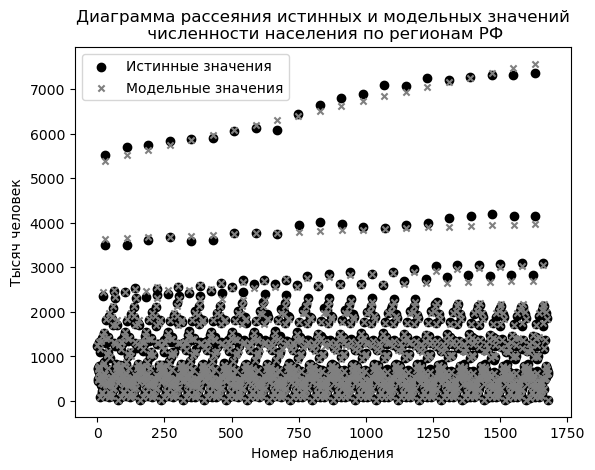

In [26]:

plt.scatter(np.arange(len(subdf[subdf["Date"].isin(range(2001,2022))]["L"].to_numpy())),subdf[subdf["Date"].isin(range(2001,2022))]["L"].to_numpy(),marker="o",c="black",label="Истинные значения")
plt.scatter(np.arange(len(M)),M,s=20,c="gray",marker="x",label="Модельные значения")
plt.legend()
plt.title("Диаграмма рассеяния истинных и модельных значений\n численности населения по регионам РФ")
plt.xlabel("Номер наблюдения")
plt.ylabel("Тысяч человек")
plt.savefig("./output/SPbayes.png")

In [28]:
r2_score(subdf[subdf["Date"].isin(range(2001,2022))]["L"].to_numpy(),M)

0.9984438433308098

In [64]:
np.save("./data/g.npy",np.array([0.00066]))

In [65]:
np.save("./data/U.npy",U)

In [66]:
np.save("./data/b.npy",np.array([-8]))